# ***Classifying Quasars From Galaxies & Stars: The Sloan Digital Sky Survey***

## Machine Learning 635: Home Work Assignment # 2

### Author: Spencer Long
**Source Data & Competition:** https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey/home  
Building simple models for classifying quasars, galaxies, and stars. 

---
---
---

# *Imports:* 

In [19]:
import urllib
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

---
# *Data:* 

Downloaded data from the Sloan Digital Sky Survey  
**Source:**https://www.sdss.org/dr14/

In [2]:
# Retrieving the data
url = 'https://raw.githubusercontent.com/peterjsadowski/sklearn_examples/master/sdss/sdss.csv'
filename = 'sdss.csv'
urllib.request.urlretrieve(url, filename)

data = pd.read_csv(filename) # creating a data frame
data.drop(["objid","specobjid","run","rerun","camcol","field"], axis = 1, inplace = True) # Unused columns.

print(data.head(n=5))
print(data.info())

           ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

    class  redshift  plate    mjd  fiberid  
0    STAR -0.000009   3306  54922      491  
1    STAR -0.000055    323  51615      541  
2  GALAXY  0.123111    287  52023      513  
3    STAR -0.000111   3306  54922      510  
4    STAR  0.000590   3306  54922      512  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
ra          10000 non-null float64
dec         10000 non-null float64
u           10000 non-null float64
g           10000 non-null float64
r           10000 n

---
# *Preprocessing Data:*

In [3]:
# Associate each class with a number.

print("Mapping: ", dict(enumerate(["GALAXY","QUASAR","STAR"])))

data["class"] = data["class"].astype("category")
data["class"] = data["class"].cat.codes

print(data["class"].value_counts().sort_index())

# Split data set.

features = data.drop("class", axis = 1)

labels = data["class"].copy()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, labels, 
                                                                            test_size=0.2, 
                                                                            random_state=42, 
                                                                            stratify=labels)

print('Train data shape:', X_train.shape, y_train.shape)
print('Test data shape:' , X_test.shape, y_test.shape)

Mapping:  {0: 'GALAXY', 1: 'QUASAR', 2: 'STAR'}
0    4998
1     850
2    4152
Name: class, dtype: int64
Train data shape: (8000, 11) (8000,)
Test data shape: (2000, 11) (2000,)


In [4]:
features.head(5)

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922,512


In [5]:
labels.head(5)

0    2
1    2
2    0
3    2
4    2
Name: class, dtype: int8

---
---
---
# **Applying Cross Validation & Determining Best Parameters**

---
---
---

# *K Nearest Neighbors Classifier*

Available Parameters: dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
First 5 of the test scores from the dataframe: 
    mean_test_score  std_test_score              params
0         0.733750        0.012203  {'n_neighbors': 1}
1         0.771375        0.013089  {'n_neighbors': 2}
2         0.772500        0.010229  {'n_neighbors': 3}
3         0.782375        0.010249  {'n_neighbors': 4}
4         0.786625        0.014424  {'n_neighbors': 5}

Best Model Results:
Best Score:  0.80175
Best Params:  {'n_neighbors': 15}
Best Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')


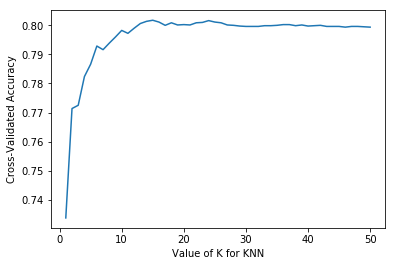

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Classifier to be used:
knn = KNeighborsClassifier()
print('Available Parameters:', knn.get_params().keys())

# Set up for Grid for Cross Validation:
k_range = list(range(1, 51))
param_grid = dict(n_neighbors = k_range)
param_grid = {'n_neighbors': k_range} # or we could use this method to set up dictionary for grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

# Fit model to data
grid.fit(X_train, y_train)

# Creates a dataframe for test scores
cv_scores = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print('First 5 of the test scores from the dataframe: \n', cv_scores.head(5))


# Best Model and Params:
print()
print('Best Model Results:')
print('Best Score: ', grid.best_score_)
print('Best Params: ', grid.best_params_)
print('Best Estimator: ', grid.best_estimator_)

# Creating Plot of Params vs. Mean test score
grid_mean_scores = grid.cv_results_['mean_test_score']

plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

---
# *Gaussian  Naive  Bayes*

In [7]:
from sklearn.naive_bayes import GaussianNB

# Classifier to be used:
GaussianNB = GaussianNB()
print('Available Parameters:', GaussianNB.get_params().keys())

# Set up for Grid for Cross Validation:
param_grid = {} 
grid = GridSearchCV(GaussianNB, param_grid, cv=10, scoring='accuracy', return_train_score=False)

# Fit model to data
grid.fit(X_train, y_train)

# Creates a dataframe for test scores
cv_scores = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print('First 5 of the test scores from the dataframe: \n', cv_scores.head(5))


# Best Model and Params:
print()
print('Best Model Results:')
print('Best Score: ', grid.best_score_)
print('Best Params: ', grid.best_params_)
print('Best Estimator: ', grid.best_estimator_)

Available Parameters: dict_keys(['priors'])
First 5 of the test scores from the dataframe: 
    mean_test_score  std_test_score params
0          0.85825        0.009524     {}

Best Model Results:
Best Score:  0.85825
Best Params:  {}
Best Estimator:  GaussianNB(priors=None)


---

# *Linear Discriminant Analysis*

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Classifier to be used:
LDA = LinearDiscriminantAnalysis()
print('Available Parameters:', LDA.get_params().keys())

# Set up for Grid for Cross Validation:
param_grid = {'solver': ['svd', 'lsqr', 'eigen']} 
grid = GridSearchCV(LDA, param_grid, cv=10, scoring='accuracy', return_train_score=False)

# Fit model to data
grid.fit(X_train, y_train)

# Creates a dataframe for test scores
cv_scores = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print('First 3 of the test scores from the dataframe: \n', cv_scores.head(3))


# Best Model and Params:
print()
print('Best Model Results:')
print('Best Score: ', grid.best_score_)
print('Best Params: ', grid.best_params_)
print('Best Estimator: ', grid.best_estimator_)

Available Parameters: dict_keys(['n_components', 'priors', 'shrinkage', 'solver', 'store_covariance', 'tol'])
First 3 of the test scores from the dataframe: 
    mean_test_score  std_test_score               params
0         0.910000        0.006391    {'solver': 'svd'}
1         0.910000        0.006391   {'solver': 'lsqr'}
2         0.805625        0.015634  {'solver': 'eigen'}

Best Model Results:
Best Score:  0.91
Best Params:  {'solver': 'svd'}
Best Estimator:  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


---
# *Quadratic Discriminant Analysis:*

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Classifier to be used:
QDA = QuadraticDiscriminantAnalysis()
print('Available Parameters:', QDA.get_params().keys())

# Set up for Grid for Cross Validation:
param_grid = {'reg_param': [0, 0.005, 0.01, 0.05]} 
grid = GridSearchCV(QDA, param_grid, cv=10, scoring='accuracy', return_train_score=False)

# Fit model to data
grid.fit(X_train, y_train)

# Creates a dataframe for test scores
cv_scores = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print('First 3 of the test scores from the dataframe: \n', cv_scores.head(3))


# Best Model and Params:
print()
print('Best Model Results:')
print('Best Score: ', grid.best_score_)
print('Best Params: ', grid.best_params_)
print('Best Estimator: ', grid.best_estimator_)

Available Parameters: dict_keys(['priors', 'reg_param', 'store_covariances', 'tol'])
First 3 of the test scores from the dataframe: 
    mean_test_score  std_test_score                params
0         0.981125        0.003965      {'reg_param': 0}
1         0.907500        0.009689  {'reg_param': 0.005}
2         0.903500        0.010054   {'reg_param': 0.01}

Best Model Results:
Best Score:  0.981125
Best Params:  {'reg_param': 0}
Best Estimator:  QuadraticDiscriminantAnalysis(priors=None, reg_param=0,
               store_covariances=False, tol=0.0001)


---
# *Decission Trees:* 

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Classifier to be used:
DTREE = DecisionTreeClassifier()
print('Available Parameters:', DTREE.get_params().keys())

# Set up for Grid for Cross Validation:
param_grid = {'random_state':[0], 'max_depth': list(range(1, 20))} 
grid = GridSearchCV(DTREE, param_grid, cv=10, scoring='accuracy', return_train_score=False)

# Fit model to data
grid.fit(X_train, y_train)

# Creates a dataframe for test scores
cv_scores = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print('First 3 of the test scores from the dataframe: \n', cv_scores.head(3))


# Best Model and Params:
print()
print('Best Model Results:')
print('Best Score: ', grid.best_score_)
print('Best Params: ', grid.best_params_)
print('Best Estimator: ', grid.best_estimator_)

Available Parameters: dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])
First 3 of the test scores from the dataframe: 
    mean_test_score  std_test_score                               params
0         0.912250        0.002627  {'max_depth': 1, 'random_state': 0}
1         0.987500        0.003578  {'max_depth': 2, 'random_state': 0}
2         0.988375        0.002955  {'max_depth': 3, 'random_state': 0}

Best Model Results:
Best Score:  0.988375
Best Params:  {'max_depth': 3, 'random_state': 0}
Best Estimator:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')



---
---
---
# **Applying The Testing Set With Best Estimators:**

**Testing Score:** Returns the mean accuracy on the given test data and labels. In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted. 

**Source code of the score function states:** Returns mean accuracy of clf.predict(X) with respect to y. Thus in our case it is the mean percentage of how accuretaly the model is able to predict the target values (y_test) given our test data (X_test).  

---
---
---

# *K Nearest Neighbors Classifier*

In [11]:
clf = KNeighborsClassifier(algorithm='auto', 
                           leaf_size=30, 
                           metric='minkowski',
                           metric_params=None, 
                           n_jobs=1, 
                           n_neighbors=15, 
                           p=2,
                           weights='uniform')

clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print('The mean accuracy on the given test data and labels is:', score)

The mean accuracy on the given test data and labels is: 0.7895


---
# *Gaussian  Naive  Bayes*

In [13]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB(priors=None)

clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print('The mean accuracy on the given test data and labels is:', score)

The mean accuracy on the given test data and labels is: 0.8625


---

# *Linear Discriminant Analysis*

In [14]:
clf = LinearDiscriminantAnalysis(n_components=None, 
                                 priors=None, 
                                 shrinkage=None,
                                 solver='svd', 
                                 store_covariance=False, 
                                 tol=0.0001)

clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print('The mean accuracy on the given test data and labels is:', score)

The mean accuracy on the given test data and labels is: 0.892


---
# *Quadratic Discriminant Analysis:*

In [15]:
clf = QuadraticDiscriminantAnalysis(priors=None,
                                    reg_param=0,
                                    store_covariances=False, 
                                    tol=0.0001)

clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print('The mean accuracy on the given test data and labels is:', score)

The mean accuracy on the given test data and labels is: 0.9815


---
# *Decission Trees:* 

In [18]:
clf = DecisionTreeClassifier(class_weight=None, 
                             criterion='gini',
                             max_depth=3,
                             max_features=None, 
                             max_leaf_nodes=None,
                             min_impurity_split=1e-07, 
                             min_samples_leaf=1,
                             min_samples_split=2, 
                             min_weight_fraction_leaf=0.0,
                             presort=False, 
                             random_state=0, 
                             splitter='best')

clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print('The mean accuracy on the given test data and labels is:', score)

The mean accuracy on the given test data and labels is: 0.991
